The objective of this project is to price Up-and-Out barrier option barrier option. 
This type of option expires when the underlying stock price touches the barrier level. Otherwise, the option will stay active amd give a payoff at the maturity.

### Methods applied
1. Pricing European Up-and-Out options using Monte Carlo Simulation

### Steps followed

1.  Defining the parameters: Stock price, Strike price, Barrier, Interest rate, Dividend yield, Expiry, Volatility, Number of time steps and simulations
2. Implementing iterations for the Monte Carlo Simulation; simulating stock prices using the Geometric Brownian Motion
3. Calculating the payoffs and option price
4. Plotting the simulated stock prices 

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy.ma as ma

We shall apply the following Geometric Brownian Motion to simulate the stock prices:

$$S_t = S_o*\exp{([r - \frac{1}{2}\sigma^2]t + {\sigma}W_t})$$

In [75]:
def Up_and_Out_Option(option_type, Stock_price, Strike, Time, Barrier, interest_rate, volatility, dividend_yield, Time_steps, Simulations):
    dt = Time/Time_steps
    Total_payoff = 0
    plot_data = []
    
    for i in range(Simulations):
        Barrier_flag = False # Flag for crossing barrier i.e, True when barrier is crossed
        Stock_price = Stock_price
        
        for j in range(Time_steps):
            ST = Stock_price*np.exp((interest_rate-0.5*volatility**2)*dt + np.random.normal()*(volatility*np.sqrt(dt)))
            Stock_price = ST # Updating the stock price
            
            if Stock_price >= Barrier:
                Barrier_flag = True
                break
        plot_data.append(Stock_price)
        if Barrier_flag:
            payoff = 0
        elif option_type =='put':
            payoff = max(0, Strike - Stock_price)
        else:
            payoff = max(0, Stock_price -Strike)
        Total_payoff = Total_payoff + payoff
        Option_price = np.exp(-interest_rate*Time)*Total_payoff/Simulations
        
    return [Option_price,plot_data]

### 1.1 Practical examples

### 1.1.1 Put Option

In [77]:
Up_and_Out_Option("put", 100, 100, 1, 125, 0.01, 0.2, 0, 100, 1000)[0]

8.26789938255304

### 1.1.2 Call Option

In [61]:
Up_and_Out_Option("call", 100, 100, 1, 125, 0.01, 0.2, 0, 100, 1000)[0]

0.0501588319964946

## 1.2 Displaying the simulated stock prices and the barrier

In [78]:
Barrier = 125
Time = 1
Simulations = 1000
plot_data = Up_and_Out_Option("put", 100, 100, 1, 125, 0.01, 0.2, 0, 100, 1000)[1]

In [79]:
plot_data2 = np.array(plot_data)
masked_data = ma.masked_where(plot_data2 >= Barrier, plot_data2)
Unmasked_data = ma.masked_where(plot_data2 < Barrier, plot_data2)

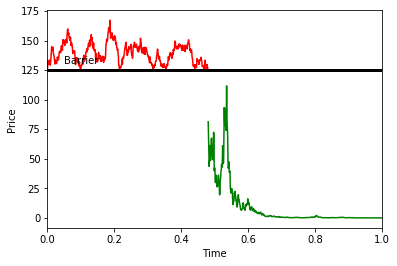

In [82]:
plt.plot(np.linspace(0,Time,Simulations),masked_data,'g')
plt.plot(np.linspace(0,Time,Simulations),Unmasked_data,'r')
plt.plot([0,Time],[Barrier,Barrier], 'k-', linewidth =3.0)
plt.annotate('Barrier',(0.05,130))
plt.xlim(0,1)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()